<a href="https://colab.research.google.com/github/liadmagen/NLP-Course/blob/master/exercises_notebooks/03_LM_classification_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Documents

In this notebook, you'll learn about **Latent Dirichlet Allocation** (LDA) algorithm, and how to use it to cluster documents.

Key-learning:
- Unsupervised machine learning for NLP
- Clustering Documents
- LDA
- python packages: *pandas*, *gensim*

This notebook includes 2 recommended videos (total length: 25min).

Estimated exercise duration: 1h.

# Setup

We start by importing pandas - a great tool for data scientists!

We load a csv of news articles from https://github.com/tblock/10kGNAD


In [1]:
from IPython.display import YouTubeVideo

In [2]:
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/tblock/10kGNAD/master/articles.csv', sep=';', error_bad_lines=False, header=None, names=['category', 'content'])

# Clustering with Latent Dirichlet Allocation (LDA)

## Introduction

We start by clusteirng our data as an unsupervised learning task: **topic modeling**.

There are many methods to cluster documents. One of which is topic modeling - where an algorithm assigns a topic to each document, and cluster them by these topics.

The documents can be represented as a set of distribution of the words and their occurances. Some of words can represent the document topic.
For example, we previously tried to locate all the documents with the words 'Android', 'OnePlus' and 'iPhone' in it. Based on the rare occurance frequency of these words, we could assume that this document was discussing mobile phones.

Dirichlet is a distribution on probability distributions .
For a deeper mathematical explanation about this distribution, watch this recommended video: https://www.youtube.com/watch?v=nfBNOWv1pgE

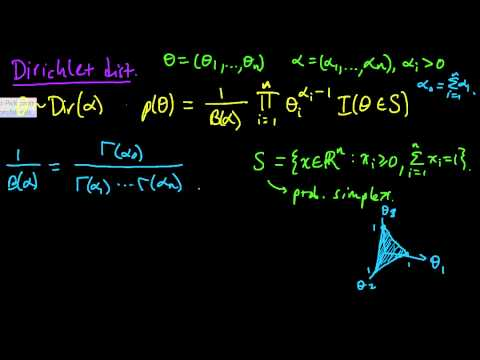

In [5]:
YouTubeVideo('nfBNOWv1pgE')

LDA itself is an unsupervised algorithm that assigns topics to each of the documents. These topics are are described as a set of words.
Each document can be related to more than one topic.
For example, an article about phones can be 80% phones, and 20% about business innovations or income.

LDA paper is a milestone in NLP and one of the recommended reading, as well as *part of your papers-for-talk list*(!)

If you're interested to know more about the algorithm method, watch this video: https://www.youtube.com/watch?v=DWJYZq_fQ2A

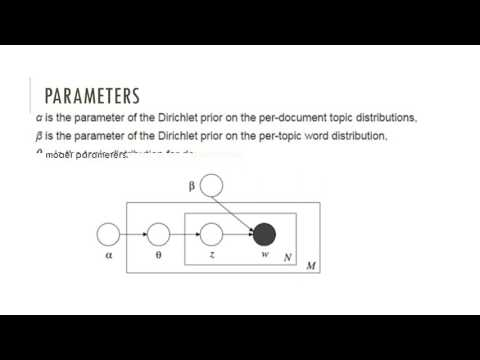

In [6]:
YouTubeVideo('DWJYZq_fQ2A')

Now, let's examine our German data set with LDA:

In the previous exercises, you got to know NLTK. 

Here we will also use NLTK's methods of stemming the words. By returning to the root of thw word, its stem, we reduce the dimensionality. For example, instead of having different words for the singular and plural form - 'word' <--> 'words' or 'Kanzler', 'Kanzlers', 'Kanzlei', etc., we trim those words into 'Kanzl'. Hence we can reduce the size of the vocabulary by at least half.

We will also remove `stopwords` from our text. In english, words such as: `a`, `an`, `the` will be removed, as they don't add much to the meaning of the sentence. For each language there is a different curated list of such words, and NLTK is a great source for those.

In this exercise, you'll be introduced to another package, specialized in topic modeling, called `gensim`:
https://radimrehurek.com/gensim/



In [8]:

from gensim import corpora, models
from gensim.utils import simple_preprocess

# from gensim.parsing.preprocessing import STOPWORDS 
# Instead of the gensim english stopwords, we use nltk's German stopwords
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

import numpy as np

from random import choice

np.random.seed(2018)

stemmer = SnowballStemmer('german')
german_stop_words = set(stopwords.words('german'))


def lemmatize_stemming(text):
    return stemmer.stem(text)

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in german_stop_words and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


Our input is only the articles. Let's convert it into a ist of all the articles:

In [9]:
all_articles = df['content'].to_list()
all_articles[:5]

['Die ARD-Tochter Degeto hat sich verpflichtet, ab August einer Quotenregelung zu folgen, die für die Gleichstellung von Regisseurinnen sorgen soll. In mindestens 20 Prozent der Filme, die die ARD-Tochter Degeto produziert oder mitfinanziert, sollen ab Mitte August Frauen Regie führen. Degeto-Chefin Christine Strobl folgt mit dieser Selbstverpflichtung der Forderung von Pro Quote Regie. Die Vereinigung von Regisseurinnen hatte im vergangenen Jahr eine Quotenregelung gefordert, um den weiblichen Filmschaffenden mehr Gehör und ökonomische Gleichstellung zu verschaffen. Pro Quote Regie kritisiert, dass, während rund 50 Prozent der Regie-Studierenden weiblich seien, der Anteil der Regisseurinnen bei Fernsehfilmen nur bei 13 bis 15 Prozent liege. In Österreich sieht die Situation ähnlich aus, auch hier wird von unterschiedlichen Seiten Handlungsbedarf angemahnt. Aber wie soll dieser aussehen? Ist die Einführung der Quotenregelung auch für die österreichische Film- und Fernsehlandschaft sinn

## Preprocessing

Let's see an example, what happens when we pre-process a document

In [10]:
print('original document: ')
words = []
article = choice(all_articles)

# This time, we don't care about punctuations as tokens (Q: why?):
print('original document, broken into words: ')
for word in article.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(article))


original document: 
original document, broken into words: 
['US-Firma', 'wirbt', 'damit,', 'dass', 'die', 'Waffe', 'in', 'der', 'Öffentlichkeit', 'praktisch', 'nicht', 'erkennbar', 'sein', 'soll.', 'Eine', 'Schusswaffe,', 'die', 'wie', 'ein', 'Smartphone', 'aussieht', '–', 'mit', 'diesem', 'innovativen', 'Design', 'wartet', 'ein', 'Hersteller', 'in', 'den', 'USA', 'auf.', 'Smartphones', 'sind', 'überall,', 'deswegen', 'werden', 'Sie', 'sich', 'mit', 'Ihrer', 'neuen', 'Pistole', 'leicht', 'in', 'das', 'Umfeld', 'der', 'heutigen', 'Zeit', 'einfügen,', 'wirbt', 'die', 'Firma', 'Ideal', 'Conceal', 'aus', 'dem', 'Bundesstaat', 'Minnesota', 'auf', 'ihrer', 'Website', 'für', 'das', 'neue', 'Produkt.', 'Die', 'Pistole', 'sei,', 'auch', 'wenn', 'sie', 'offen', 'getragen', 'wird,', 'praktisch', 'nicht', 'zu', 'entdecken.', 'In', 'die', 'Waffe', 'passen', 'den', 'Angaben', 'zufolge', 'zwei', 'Kugeln.', 'Sie', 'passt', 'ebenso', 'wie', 'ein', 'Smartphone', 'in', 'die', 'Hosentasche.', 'Auf', 'den'

Now let's pre-process them all (takes a bit ;) ):

In [11]:
processed_docs = list(map(preprocess, all_articles))
processed_docs[:10]

[['tocht',
  'degeto',
  'verpflichtet',
  'august',
  'quotenregel',
  'folg',
  'gleichstell',
  'regisseurinn',
  'sorg',
  'mindest',
  'prozent',
  'film',
  'tocht',
  'degeto',
  'produziert',
  'mitfinanziert',
  'soll',
  'mitt',
  'august',
  'frau',
  'regi',
  'fuhr',
  'degeto',
  'chefin',
  'christin',
  'strobl',
  'folgt',
  'forder',
  'quot',
  'regi',
  'verein',
  'regisseurinn',
  'vergang',
  'jahr',
  'quotenregel',
  'gefordert',
  'weiblich',
  'filmschaff',
  'mehr',
  'gehor',
  'okonom',
  'gleichstell',
  'verschaff',
  'quot',
  'regi',
  'kritisiert',
  'rund',
  'prozent',
  'regi',
  'studier',
  'weiblich',
  'seien',
  'anteil',
  'regisseurinn',
  'fernsehfilm',
  'prozent',
  'lieg',
  'osterreich',
  'sieht',
  'situation',
  'ahnlich',
  'seit',
  'handlungsbedarf',
  'angemahnt',
  'ausseh',
  'einfuhr',
  'quotenregel',
  'osterreich',
  'film',
  'sinnvoll',
  'diskuti',
  'forum'],
 ['angenomm',
  'word',
  'geplant',
  'weg',
  'gering',
  '

## Setting up the dictionary

Our preprocessing is done. 
We now need to calculate the accurance frequencies of each of our stemmed words. But first, we will create a vocabulary dictionary, where every word appears once. Every article would be represented as a bag-of-words (where the order doesn't matter), of the collection of words that the article contain.

---

Q: Why is it called bag-of-words? 

Hint: Think about your probability lessons - where you had randomly picked out white or black balls out of a bag...

In [12]:
dictionary = corpora.Dictionary(processed_docs)


Let's take a look:

In [13]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


0 ahnlich
1 angemahnt
2 anteil
3 august
4 ausseh
5 chefin
6 christin
7 degeto
8 diskuti
9 einfuhr
10 fernsehfilm


Second, we filter the tokens that may appear to often.

We have full control on the process. 

### Model Hyperparameter tuning

In [ ]:
## Model hyper parameters: 
## How would changing these parameters influence the result?
## After running this example, return here to change it and try it out

## This is the dictionary preparation parameters:

filter_tokens_if_container_documents_are_less_than = 15
filter_tokens_if_appeared_percentage_more_than = 0.5
keep_the_first_n_tokens=100000

## and the LDA Parameters: 
## try playing with this, to see how it influence the results.
num_of_topics = 10

In [ ]:
dictionary.filter_extremes(
    no_below=filter_tokens_if_container_documents_are_less_than, 
    no_above=filter_tokens_if_appeared_percentage_more_than, 
    keep_n=keep_the_first_n_tokens)


We now create a bag-of-words (BOW) dictionary for each document:

```{ 'word_id': count }```


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

Let's take a look.

Our dictionary actually save word_ids, so we have to peek in the dictionary to know which word does the id represent:

In [ ]:
sample_bow_doc = choice(bow_corpus)

print ('We peek in the dictionary, for each word_id, to get which word it is:')
for i in range(len(sample_bow_doc)):
    print("Word {} (\"{}\") appears {} time.".format(sample_bow_doc[i][0], 
                                               dictionary[sample_bow_doc[i][0]], 
sample_bow_doc[i][1]))


print('\n Because the processed bag-of-word document is pairs of (word_id, # of occurnces) and looks like this:')
print(sample_bow_doc)


We peek in the dictionary, for each word_id, to get which word it is:
Word 9 ("folg") appears 1 time.
Word 35 ("situation") appears 2 time.
Word 37 ("sorg") appears 1 time.
Word 48 ("bereich") appears 1 time.
Word 64 ("aktuell") appears 2 time.
Word 82 ("befind") appears 1 time.
Word 96 ("dabei") appears 2 time.
Word 146 ("gibt") appears 2 time.
Word 147 ("gross") appears 2 time.
Word 148 ("grund") appears 1 time.
Word 153 ("heisst") appears 1 time.
Word 185 ("muss") appears 1 time.
Word 189 ("neu") appears 1 time.
Word 212 ("schritt") appears 1 time.
Word 240 ("thema") appears 1 time.
Word 248 ("untersucht") appears 1 time.
Word 285 ("aufreg") appears 1 time.
Word 294 ("derzeit") appears 1 time.
Word 332 ("teil") appears 1 time.
Word 392 ("media") appears 1 time.
Word 450 ("gemeinsam") appears 1 time.
Word 457 ("kritisch") appears 1 time.
Word 463 ("nach") appears 1 time.
Word 502 ("bish") appears 1 time.
Word 530 ("steht") appears 1 time.
Word 580 ("smartphon") appears 5 time.
Word 5

## LDA model using Bag-of-words

Let's start by applying the LDA model using the bag-of-words:

In [ ]:
lda_model = models.LdaMulticore(bow_corpus, num_topics=num_of_topics, id2word=dictionary, passes=2, workers=2)

Let's observe the created topics.

We will loop over the topics and check, which words construct them.

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.015*"prozent" + 0.013*"euro" + 0.011*"jahr" + 0.008*"osterreich" + 0.007*"sagt" + 0.005*"million" + 0.005*"land" + 0.005*"wien" + 0.005*"seit" + 0.004*"erst"
Topic: 1 
Words: 0.009*"erst" + 0.008*"spiel" + 0.005*"jahr" + 0.005*"jahrig" + 0.004*"wien" + 0.004*"zwei" + 0.004*"minut" + 0.003*"salzburg" + 0.003*"seit" + 0.003*"schon"
Topic: 2 
Words: 0.008*"jahr" + 0.007*"sagt" + 0.005*"neu" + 0.005*"wien" + 0.004*"forsch" + 0.004*"mensch" + 0.004*"erst" + 0.004*"zwei" + 0.004*"gross" + 0.004*"lang"
Topic: 3 
Words: 0.008*"appl" + 0.007*"euro" + 0.007*"jahr" + 0.006*"nutz" + 0.006*"neu" + 0.004*"etwa" + 0.004*"laut" + 0.004*"facebook" + 0.004*"million" + 0.004*"gibt"
Topic: 4 
Words: 0.011*"wien" + 0.009*"standard" + 0.005*"erst" + 0.005*"osterreich" + 0.005*"sagt" + 0.005*"gibt" + 0.005*"jahr" + 0.004*"schon" + 0.004*"mensch" + 0.004*"neu"
Topic: 5 
Words: 0.006*"neu" + 0.005*"wien" + 0.004*"schon" + 0.004*"mitarbeit" + 0.004*"jahr" + 0.004*"seit" + 0.004*"erst" + 0.004

## TF / IDF

Let's take it one step further. We will cluster our document by running the LDA using TF/IDF.

We start with TF/IDF calculation on our bag-of-words.
TF/IDF needs as an input a dictionary of frequencies, and it calculates the term-frequency and the inversed document frequency accordingly.

The result is re-weighted dictionary of documents:

In [ ]:
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

from pprint import pprint # for printing the object nicely

for doc in tfidf_corpus:
    pprint(doc)
    break


[(0, 0.07701104184392196),
 (1, 0.09759319572760512),
 (2, 0.17865097755146575),
 (3, 0.12576090253155267),
 (4, 0.1213785897586335),
 (5, 0.14966250355427194),
 (6, 0.12018647403621047),
 (7, 0.10920625806276203),
 (8, 0.19098038980835488),
 (9, 0.06256739336574345),
 (10, 0.08731418138743945),
 (11, 0.08647740625891134),
 (12, 0.14032936757689066),
 (13, 0.06577036204104757),
 (14, 0.07405575155931744),
 (15, 0.08932548877573288),
 (16, 0.09072789199095227),
 (17, 0.33117488361905073),
 (18, 0.15948795931092485),
 (19, 0.020273454088271383),
 (20, 0.0790627311642285),
 (21, 0.07726479954315345),
 (22, 0.08357012518526766),
 (23, 0.08069377542776295),
 (24, 0.1167129985832824),
 (25, 0.07975467566677337),
 (26, 0.11654151351208203),
 (27, 0.14006253783120604),
 (28, 0.23588700353404207),
 (29, 0.512947931753448),
 (30, 0.03877051844587956),
 (31, 0.046501312545973304),
 (32, 0.027372494763772317),
 (33, 0.06401699265145537),
 (34, 0.11980004049538755),
 (35, 0.08247600216314194),
 (36

Now let's apply LDA on the tfidf corpus, with the same amount of topics.

In [ ]:
lda_model_tfidf = models.LdaMulticore(tfidf_corpus, num_topics=num_of_topics, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.002*"euro" + 0.002*"wien" + 0.001*"prozent" + 0.001*"osterreich" + 0.001*"million" + 0.001*"sagt" + 0.001*"bank" + 0.001*"jahr" + 0.001*"neu" + 0.001*"gross"
Topic: 1 Word: 0.005*"prozent" + 0.002*"euro" + 0.002*"volltext" + 0.002*"basier" + 0.002*"artikel" + 0.002*"rechtlich" + 0.002*"verfug" + 0.002*"osterreich" + 0.002*"steht" + 0.002*"grund"
Topic: 2 Word: 0.002*"prozent" + 0.002*"wien" + 0.002*"mensch" + 0.002*"euro" + 0.002*"jahr" + 0.002*"osterreich" + 0.002*"sagt" + 0.001*"volltext" + 0.001*"basier" + 0.001*"fluchtling"
Topic: 3 Word: 0.003*"euro" + 0.002*"wien" + 0.002*"prozent" + 0.002*"osterreich" + 0.002*"volltext" + 0.002*"basier" + 0.002*"bank" + 0.002*"neu" + 0.002*"artikel" + 0.001*"rechtlich"
Topic: 4 Word: 0.003*"prozent" + 0.003*"euro" + 0.002*"bank" + 0.002*"osterreich" + 0.002*"deutsch" + 0.001*"sagt" + 0.001*"jahr" + 0.001*"wien" + 0.001*"griechenland" + 0.001*"milliard"
Topic: 5 Word: 0.003*"prozent" + 0.002*"bank" + 0.002*"euro" + 0.002*"unterne

## Inference

Now let's classify one of the articles with our models

In [ ]:
test_doc = choice(range(len(processed_docs)))
processed_docs[test_doc]

['neunjahr',
 'wunscht',
 'comic',
 'held',
 'verbrecherjagd',
 'geh',
 'polizei',
 'bevolker',
 'spielt',
 'eifrig',
 'sydney',
 'wunsch',
 'schwerkrank',
 'bub',
 'sydney',
 'donnerstag',
 'comicwelt',
 'superheld',
 'iron',
 'verwandelt',
 'aug',
 'tausend',
 'zuschau',
 'neunjahr',
 'domenic',
 'pac',
 'iron',
 'kampf',
 'schurk',
 'ultron',
 'gefahrt',
 'polizei',
 'bevolker',
 'spielt',
 'begeistert',
 'schauspiel',
 'robert',
 'downey',
 'iron',
 'film',
 'verkorpert',
 'feuert',
 'pac',
 'twitt',
 'geheim',
 'mission',
 'heut',
 'domenic',
 'schrieb',
 'star',
 'sent',
 'very',
 'special',
 'secret',
 'mission',
 'today',
 'domenic',
 'ironboyau',
 'makeawishaust',
 'organisiert',
 'spektakel',
 'austral',
 'mak',
 'wish',
 'stiftung',
 'schwerkrank',
 'kind',
 'sehnlich',
 'wunsch',
 'erfullt',
 'angebor',
 'mukoviszidos',
 'leidend',
 'domenic',
 'gewunscht',
 'iron',
 'verbrecherjagd',
 'geh',
 'szeneri',
 'erinnert',
 'ebenfall',
 'stiftung',
 'arrangiert',
 'spektakel',
 '

Using the BOW model:

In [ ]:
for index, score in sorted(lda_model[bow_corpus[test_doc]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.4408895671367645	 
Topic: 0.008*"sagt" + 0.008*"jahr" + 0.006*"seit" + 0.004*"erst" + 0.004*"neu" + 0.004*"word" + 0.004*"laut" + 0.004*"osterreich" + 0.004*"fluchtling" + 0.003*"wien"

Score: 0.2827499508857727	 
Topic: 0.009*"erst" + 0.008*"spiel" + 0.005*"jahr" + 0.005*"jahrig" + 0.004*"wien" + 0.004*"zwei" + 0.004*"minut" + 0.003*"salzburg" + 0.003*"seit" + 0.003*"schon"

Score: 0.2713947892189026	 
Topic: 0.007*"jahr" + 0.006*"erst" + 0.005*"sagt" + 0.005*"seit" + 0.005*"wien" + 0.004*"spiel" + 0.004*"neu" + 0.004*"schon" + 0.003*"etwa" + 0.003*"bereit"


And with the TF/IDF model:

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[test_doc]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6395396590232849	 
Topic: 0.002*"prozent" + 0.002*"wien" + 0.002*"mensch" + 0.002*"euro" + 0.002*"jahr" + 0.002*"osterreich" + 0.002*"sagt" + 0.001*"volltext" + 0.001*"basier" + 0.001*"fluchtling"

Score: 0.17812730371952057	 
Topic: 0.003*"prozent" + 0.003*"euro" + 0.002*"bank" + 0.002*"osterreich" + 0.002*"deutsch" + 0.001*"sagt" + 0.001*"jahr" + 0.001*"wien" + 0.001*"griechenland" + 0.001*"milliard"

Score: 0.11668888479471207	 
Topic: 0.002*"prozent" + 0.002*"euro" + 0.002*"jahr" + 0.002*"googl" + 0.001*"wien" + 0.001*"neu" + 0.001*"bank" + 0.001*"osterreich" + 0.001*"million" + 0.001*"erst"

Score: 0.04796544089913368	 
Topic: 0.003*"prozent" + 0.002*"bank" + 0.002*"euro" + 0.002*"unternehm" + 0.002*"wien" + 0.001*"million" + 0.001*"jahr" + 0.001*"googl" + 0.001*"osterreich" + 0.001*"neu"

Score: 0.014131376519799232	 
Topic: 0.005*"prozent" + 0.002*"euro" + 0.002*"volltext" + 0.002*"basier" + 0.002*"artikel" + 0.002*"rechtlich" + 0.002*"verfug" + 0.002*"osterreich" + 0.

Now let's try it on a new document!

Go to a news website, such as [orf.at](https://orf.at/) and copy an article of your choice here:

In [ ]:
unseen_document = """Sobotka sprach in einer um eineinhalb Stunden verspäteten Pressekonferenz am Abend von einer „schwierigen“, aber „sachlichen und pointierten“ Diskussion im Hauptausschuss. Er meinte, dass von Gesundheitsminister Rudolf Anschober (Grüne), die „Notwendigkeit, Verhältnismäßigkeit und Richtigkeit“ der Maßnahmen erläutert worden seien. Zudem betonte Sobotka die Wichtigkeit der im Covid-Maßnahmengesetz vorgesehenen Mitsprache des Parlaments bei Maßnahmen, bei denen auch die Freiheitsrechte betroffen seien.
Der Nationalratspräsident zitierte auch die deutsche Kanzlerin Angela Merkel, die die Maßnahmen im Kampf gegen die Pandemie als „demokratische Zumutung“ bezeichnet hatte. Dem sei nicht nur zuzustimmen, das sei auch zu unterstreichen, sagte er. Die Eindämmung der Pandemie könne aber nur gelingen, wenn sich alle Österreicher einbringen. Der Beschluss alleine reiche nicht, die Maßnahmen müssten auch im Geiste verinnerlicht werden, appellierte Sobotka an die Bevölkerung, die Maßnahmen mitzutragen.
Rendi-Wagner kritisiert Regierung
Die Opposition hatte schon vor der Sitzung – und dann auch noch einmal danach – ihre Kritik an der Regierung bekräftigt. „Die Bundesregierung hat die Kontrolle über das Infektionsgeschehen verloren und hat die schwierige Situation, vor der wir jetzt stehen, zu verantworten“, kritisierte SPÖ-Klub- und Parteivorsitzende Rendi-Wagner.
Sessel auf Tischen in einem geschlossenen Lokal
DEBATTEWie gerechtfertigt sind die Maßnahmen?"""

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.9891536831855774	 Topic: 0.008*"sagt" + 0.008*"jahr" + 0.006*"seit" + 0.004*"erst" + 0.004*"neu"


# Your turn:

Replace the given corpus with one in another language - maybe your own native language? You can find corpus here: https://www.corpusdata.org/intro.asp. 

Careful: You will need to change the [Stemming](https://snowballstem.org/algorithms/) and the [Stopwords](https://www.kaggle.com/rtatman/stopword-lists-for-19-languages) to support your language. Make a web-search after the appropriate ones. 

Use the notebook to reproduce the result.

Try changing the parameters to get a satisfying level of clustering.

Which parameters worked best for the language you chose? 